In [1]:
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':35000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]

In [2]:
quote = Quote(symbols, 50, 10)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-16 to 2019-07-05 - 270'

In [20]:
quote.drop_mask()
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 6) & (stat['shrp'] > 1)]
print(len(stat))
stat

49


,len,mean,std,shrp,drawdown
Symbols,,,,,
LMT,25,2.906696,1.271729,2.223218,3.150072
PFE,25,1.842851,0.853786,2.065490,1.759590
AMGN,25,3.582783,1.809724,1.935885,3.143341
TMO,25,4.389460,2.247494,1.917734,2.590128
BSX,25,4.485978,2.364442,1.863701,2.484928
SYK,25,4.477746,2.443055,1.800361,2.457642
RELX,25,2.601042,1.414228,1.783077,1.928484
ILMN,25,7.009123,3.924782,1.765642,2.964856
RACE,25,5.299789,2.985127,1.748811,1.670678


Populating the interactive namespace from numpy and matplotlib
evicted BUD 0.731994238605671
evicted AON 0.9166544050394879
evicted BAX 0.8561219530850577
evicted DHR 0.9483986470864582
evicted AMGN 0.8521370946449364
evicted BHP 0.9792262291640275
evicted ABT 0.9460059946700354
evicted SBUX 0.9317241014174037
evicted AFL 0.8958111088903389
evicted PFE 0.6887389435215252
evicted TMO 0.9025098475198755
evicted SYK 0.9149736413799381
evicted FIS 0.7080229445572015
evicted APD 0.7895016689884414
evicted BBL 0.8982562092762164
evicted LMT 0.4150122158220887
evicted MDT 0.8308280192300055
evicted BSX 0.7874072530519518
evicted MCD 0.7028274277714984
evicted INFY 0.8732101903100488
evicted PHG 0.9268388330219863
evicted TD 0.8132800830067858
evicted KO 0.9010811070305937
evicted EL 0.8360425028926782
evicted BBD 0.9582229551517809
evicted WM 0.8493702430787332
evicted ORAN 0.8600313560719094
evicted CAT 0.7571307617311385
evicted ZTS 0.899673147537268
evicted RELX 0.8000818901986128
evicted 

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,25.0,3.427275,0.397521,2.630254,3.163114,3.341996,3.668495,4.127142,8.421968,0.628351
ABEV,25.0,4.990730,2.942505,0.213214,3.036873,5.701759,6.572763,11.386140,1.669110,3.941910
ICE,25.0,2.597576,1.516052,-0.803950,1.376134,2.522612,3.638270,5.193686,1.661032,2.593062
NVS,25.0,3.452294,2.127030,-2.089423,1.999554,4.287062,4.992007,6.596751,1.585746,2.543104
WMT,25.0,3.545731,2.247576,0.128324,1.337485,3.263445,4.979893,7.521685,1.542269,1.198009
BDX,25.0,3.264840,2.452450,-0.146691,1.548062,2.554939,4.701017,8.693796,1.298895,2.518631
HD,25.0,3.799574,2.927330,-1.562976,2.000579,3.481214,5.719660,9.949782,1.270854,3.081654
CTSH,25.0,1.925074,1.488622,-0.468272,0.841516,1.934427,2.749356,5.963778,1.239877,2.918537
ITUB,25.0,5.655833,4.815083,-2.678568,3.271199,5.016718,7.842681,16.870149,1.158125,3.646407
HCA,25.0,3.234052,2.842350,-2.380128,0.629456,4.288582,5.275561,8.158961,1.109887,5.345894


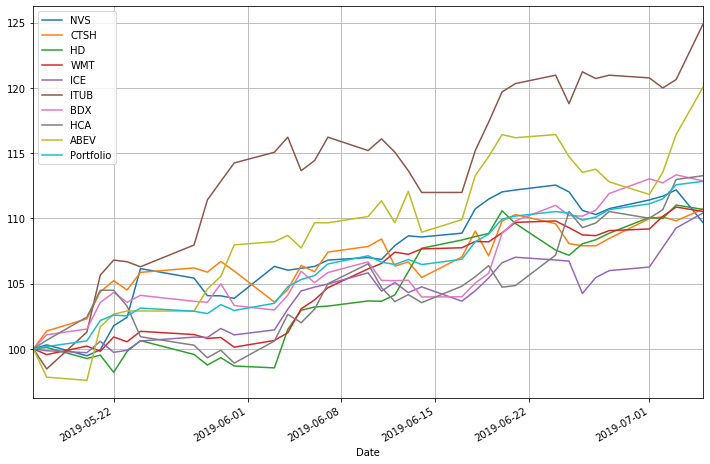

In [21]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)